# Setup

In [397]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Import

In [398]:
# Read from Excel file exported from SharePoint
df_list_data = pd.read_excel('input/sharepoint_list_data.xlsx', sheetname='Sheet1')

df_list_data

,ID,Company,Offices
0,1,Company 1,;#Ireland
1,2,Company 2,;#Ireland;#Hong Kong;#USA
2,3,Company 3,;#Hong Kong;#USA
3,4,Company 4,;#Ireland;#Hong Kong
4,5,Company 5,;#Ireland;#USA


# Data Clenase

In [399]:
# Store interim output in a temporary DataFrame
df_temp = df_list_data['Offices'].str.split(';#')

df_temp

0                    [, Ireland]
1    [, Ireland, Hong Kong, USA]
2             [, Hong Kong, USA]
3         [, Ireland, Hong Kong]
4               [, Ireland, USA]
Name: Offices, dtype: object

In [400]:
# Transpose each record into the same column
df_temp = df_temp.apply(Series, 1).stack()

df_temp

0  0             
   1      Ireland
1  0             
   1      Ireland
   2    Hong Kong
   3          USA
2  0             
   1    Hong Kong
   2          USA
3  0             
   1      Ireland
   2    Hong Kong
4  0             
   1      Ireland
   2          USA
dtype: object

In [401]:
# Remove the first column
df_temp.index = df_temp.index.droplevel(-1)

# Name the DataFrame, which is necessary for the join
df_temp.name = "Offices"

df_temp

0             
0      Ireland
1             
1      Ireland
1    Hong Kong
1          USA
2             
2    Hong Kong
2          USA
3             
3      Ireland
3    Hong Kong
4             
4      Ireland
4          USA
Name: Offices, dtype: object

In [404]:
# Deleting the Offices column, which is necesary before joining the DataFrames
df_list_data.drop(['Offices'], axis=1, inplace=True)
df_temp = df_list_data.join(df_temp)

df_temp

,ID,Company,Offices
0,1,Company 1,
0,1,Company 1,Ireland
1,2,Company 2,
1,2,Company 2,Ireland
1,2,Company 2,Hong Kong
1,2,Company 2,USA
2,3,Company 3,
2,3,Company 3,Hong Kong
2,3,Company 3,USA
3,4,Company 4,


In [405]:
# Remove empty rows
df_temp = df_temp[df_temp.Offices != '']

df_temp

,ID,Company,Offices
0,1,Company 1,Ireland
1,2,Company 2,Ireland
1,2,Company 2,Hong Kong
1,2,Company 2,USA
2,3,Company 3,Hong Kong
2,3,Company 3,USA
3,4,Company 4,Ireland
3,4,Company 4,Hong Kong
4,5,Company 5,Ireland
4,5,Company 5,USA


In [406]:
# Output this just as a quick check
df_output = df_temp['Offices'].value_counts().sort_index()

df_output

Hong Kong    3
Ireland      4
USA          3
Name: Offices, dtype: int64

# Visualizations

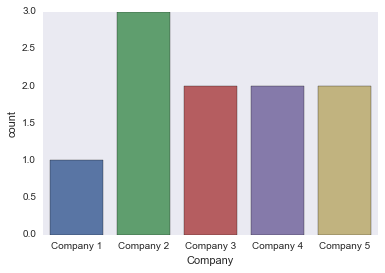

In [407]:
# Use Seaborn to crank out visualizations using default settings
# Number of offices in any given company
sns.countplot(x='Company', data=df_temp)

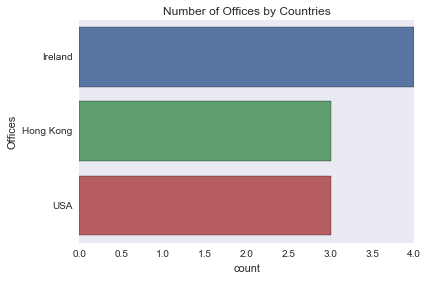

In [408]:
# Graph number of offices in any given region
plt.title('Number of Offices by Countries')

sns.countplot(y='Offices', data=df_temp)

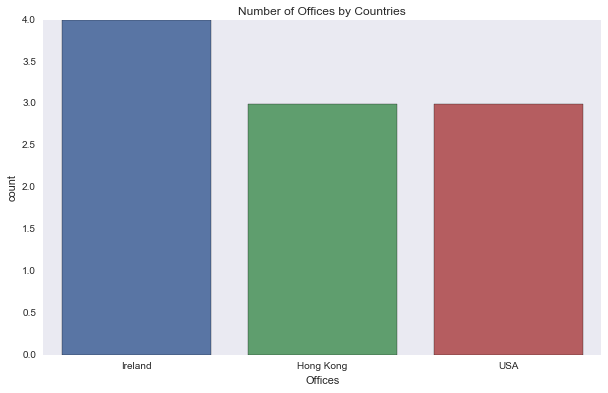

In [409]:
# Graph number of offices in any given region
plt.figure(figsize=(10,6))
plt.title('Number of Offices by Countries')

sns.countplot(x='Offices', data=df_temp)